In [1]:
import numpy as np
import pandas as pd
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt


In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import cv2


In [ ]:
train_dir = '/kaggle/input/eye-train-data/dataset'
test_dir = '/kaggle/input/testdata/dataset'
img_size = 224
batch_size = 32
num_classes = len(os.listdir(train_dir))  


In [ ]:
# Data Augmentation and Preprocessing for training and validation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  
)

# Training generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

# Validation generator
validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Test generator 
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_size, img_size),
    batch_size=1,
    class_mode='categorical',
    shuffle=False
)


Found 9712 images belonging to 14 classes.
Found 2422 images belonging to 14 classes.
Found 18204 images belonging to 14 classes.


In [5]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
import os


In [ ]:
# MobileNetV2 
mobilenet = MobileNetV2(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))

for layer in mobilenet.layers:
    layer.trainable = False

# Build model
model = Sequential([
    mobilenet,
    GlobalAveragePooling2D(),
    Dense(1024, activation='relu'),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=20,
    callbacks=[early_stopping]
)

Epoch 1/20


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1732110711.748599     118 service.cc:145] XLA service 0x7953d00020d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1732110711.748660     118 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


  1/304 ━━━━━━━━━━━━━━━━━━━━ 1:19:56 16s/step - accuracy: 0.1562 - loss: 2.8861

I0000 00:00:1732110716.349234     118 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


304/304 ━━━━━━━━━━━━━━━━━━━━ 338s 1s/step - accuracy: 0.5325 - loss: 1.4182 - val_accuracy: 0.6131 - val_loss: 1.0270
Epoch 2/20
304/304 ━━━━━━━━━━━━━━━━━━━━ 238s 768ms/step - accuracy: 0.7422 - loss: 0.7235 - val_accuracy: 0.6449 - val_loss: 0.9387
Epoch 3/20
304/304 ━━━━━━━━━━━━━━━━━━━━ 245s 792ms/step - accuracy: 0.7692 - loss: 0.6271 - val_accuracy: 0.6974 - val_loss: 0.8068
Epoch 4/20
304/304 ━━━━━━━━━━━━━━━━━━━━ 242s 779ms/step - accuracy: 0.7923 - loss: 0.5558 - val_accuracy: 0.6755 - val_loss: 0.8665
Epoch 5/20
304/304 ━━━━━━━━━━━━━━━━━━━━ 244s 788ms/step - accuracy: 0.8073 - loss: 0.5289 - val_accuracy: 0.6936 - val_loss: 0.7892
Epoch 6/20
304/304 ━━━━━━━━━━━━━━━━━━━━ 248s 800ms/step - accuracy: 0.8147 - loss: 0.5001 - val_accuracy: 0.6936 - val_loss: 0.8189
Epoch 7/20
304/304 ━━━━━━━━━━━━━━━━━━━━ 251s 811ms/step - accuracy: 0.8112 - loss: 0.4879 - val_accuracy: 0.6969 - val_loss: 0.8131
Epoch 8/20
304/304 ━━━━━━━━━━━━━━━━━━━━ 247s 796ms/step - accuracy: 0.8264 - loss: 0.4636 

In [ ]:
# Test generator
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,  
    target_size=(img_size, img_size),
    batch_size=1,  
    class_mode='categorical',
    shuffle=False  
)


Found 18204 images belonging to 14 classes.


In [62]:
print(f"Number of test samples: {test_generator.samples}")

Number of test samples: 18204


In [63]:
# Evaluate on the test set
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test Accuracy: {test_acc * 100:.2f}%')

# Classification Report
y_true = test_generator.classes
y_pred = np.argmax(model.predict(test_generator), axis=-1)
print(classification_report(y_true, y_pred, target_names=list(test_generator.class_indices.keys())))


   34/18204 ━━━━━━━━━━━━━━━━━━━━ 1:26 5ms/step - accuracy: 0.9947 - loss: 0.1165

/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


18204/18204 ━━━━━━━━━━━━━━━━━━━━ 248s 14ms/step - accuracy: 0.8647 - loss: 0.3503
Test Accuracy: 85.79%
18204/18204 ━━━━━━━━━━━━━━━━━━━━ 211s 12ms/step
                                  precision    recall  f1-score   support

                    Bulging_Eyes       0.96      0.87      0.91       957
Central_Serous_Chorioretinopathy       0.72      0.92      0.81      1158
                    Crossed_Eyes       0.88      0.94      0.91      1392
                      Disc_Edema       0.91      0.86      0.89      1072
                    Macular_Scar       0.81      0.70      0.76      1937
                          Myopia       0.88      0.90      0.89      2251
                       Pterygium       1.00      1.00      1.00      1020
              Retinal_Detachment       0.98      0.91      0.94      1158
            Retinitis_Pigmentosa       0.96      0.90      0.93      1219
                         Uveitis       0.97      0.96      0.97      1400
                    cataract_eye 

In [11]:
# Save the model
model.save('/kaggle/working/eye_disease_detection_model.h5')

# Load the saved model
model = load_model('/kaggle/working/eye_disease_detection_model.h5')


In [ ]:
def predict_eye_disease(img_path):
    img = image.load_img(img_path, target_size=(img_size, img_size))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.  
    
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)
    
    class_labels = {v: k for k, v in train_generator.class_indices.items()}
    print(f"Predicted class: {class_labels[predicted_class]}")
    return class_labels[predicted_class]

# Example prediction
test_image_path = '/kaggle/input/eye-test-data/Test/Crossed_Eyes/Crossed_Eyes-1.jpeg'
predict_eye_disease(test_image_path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Crossed_Eyes


'Crossed_Eyes'

In [ ]:
def predict_eye_disease(img_path):
    img = image.load_img(img_path, target_size=(img_size, img_size))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255. 
    
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)
    
    class_labels = {v: k for k, v in train_generator.class_indices.items()}
    print(f"Predicted class: {class_labels[predicted_class]}")
    return class_labels[predicted_class]

# Example prediction
test_image_path = '/kaggle/input/eye-test-data/Test/bulging_eye/bulging_eye-1.jpeg'
predict_eye_disease(test_image_path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Bulging_Eyes


'Bulging_Eyes'

In [ ]:
def predict_eye_disease(img_path):
    img = image.load_img(img_path, target_size=(img_size, img_size))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.  
    
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)
    
    class_labels = {v: k for k, v in train_generator.class_indices.items()}
    print(f"Predicted class: {class_labels[predicted_class]}")
    return class_labels[predicted_class]

# Example prediction
test_image_path = '/kaggle/input/eye-test-data/Test/cataract_eye/cataract-3.jpg'
predict_eye_disease(test_image_path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted class: normal_eye


'normal_eye'

In [ ]:
def predict_eye_disease(img_path):
    img = image.load_img(img_path, target_size=(img_size, img_size))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.  
    
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)
    
    class_labels = {v: k for k, v in train_generator.class_indices.items()}
    print(f"Predicted class: {class_labels[predicted_class]}")
    return class_labels[predicted_class]

# Example prediction
test_image_path = '/kaggle/input/eye-test-data/Test/diabetic_retinopathy_eye/diabetic_retinopathy_eye-1.jpeg'
predict_eye_disease(test_image_path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Predicted class: diabetic_retinopathy_eye


'diabetic_retinopathy_eye'

In [ ]:
def predict_eye_disease(img_path):
    img = image.load_img(img_path, target_size=(img_size, img_size))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.  
    
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)
    
    class_labels = {v: k for k, v in train_generator.class_indices.items()}
    print(f"Predicted class: {class_labels[predicted_class]}")
    return class_labels[predicted_class]

# Example prediction
test_image_path = '/kaggle/input/eye-test-data/Test/Pterygium/Pterygium-1.jpg'
predict_eye_disease(test_image_path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Pterygium


'Pterygium'

In [ ]:
def predict_eye_disease(img_path):
    img = image.load_img(img_path, target_size=(img_size, img_size))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.  
    
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)
    
    class_labels = {v: k for k, v in train_generator.class_indices.items()}
    print(f"Predicted class: {class_labels[predicted_class]}")
    return class_labels[predicted_class]

# Example prediction
test_image_path = '/kaggle/input/eye-test-data/Test/normal_eye/normal_eye-1.jpg'
predict_eye_disease(test_image_path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted class: normal_eye


'normal_eye'

In [ ]:
def predict_eye_disease(img_path):
    img = image.load_img(img_path, target_size=(img_size, img_size))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.  
    
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)
    
    class_labels = {v: k for k, v in train_generator.class_indices.items()}
    print(f"Predicted class: {class_labels[predicted_class]}")
    return class_labels[predicted_class]

# Example prediction
test_image_path = '/kaggle/input/eye-test-data/Test/Macular_Scar/Macular Scar-1.jpg'
predict_eye_disease(test_image_path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Macular_Scar


'Macular_Scar'

In [ ]:
def predict_eye_disease(img_path):
    img = image.load_img(img_path, target_size=(img_size, img_size))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.  
    
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)
    
    class_labels = {v: k for k, v in train_generator.class_indices.items()}
    print(f"Predicted class: {class_labels[predicted_class]}")
    return class_labels[predicted_class]

# Example prediction
test_image_path = '/kaggle/input/eye-test-data/Test/Uveitis/Uveitis-1.jpeg'
predict_eye_disease(test_image_path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Uveitis


'Uveitis'

In [ ]:
def predict_eye_disease(img_path):
    img = image.load_img(img_path, target_size=(img_size, img_size))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.  
    
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)
    
    class_labels = {v: k for k, v in train_generator.class_indices.items()}
    print(f"Predicted class: {class_labels[predicted_class]}")
    return class_labels[predicted_class]

# Example prediction
test_image_path = '/kaggle/input/eye-test-data/Test/Central_Serous_Chorioretinopathy/CSCR-1.jpg'
predict_eye_disease(test_image_path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted class: Central_Serous_Chorioretinopathy


'Central_Serous_Chorioretinopathy'

In [ ]:
def predict_eye_disease(img_path):
    img = image.load_img(img_path, target_size=(img_size, img_size))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.  
    
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)
    
    class_labels = {v: k for k, v in train_generator.class_indices.items()}
    print(f"Predicted class: {class_labels[predicted_class]}")
    return class_labels[predicted_class]

# Example prediction
test_image_path = '/kaggle/input/eye-test-data/Test/Disc_Edema/Disc Edema-1.jpg'
predict_eye_disease(test_image_path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted class: Disc_Edema


'Disc_Edema'

In [ ]:
def predict_eye_disease(img_path):
    img = image.load_img(img_path, target_size=(img_size, img_size))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.  
    
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)
    
    class_labels = {v: k for k, v in train_generator.class_indices.items()}
    print(f"Predicted class: {class_labels[predicted_class]}")
    return class_labels[predicted_class]

# Example prediction
test_image_path = '/kaggle/input/eye-test-data/Test/Myopia/Myopia-1.jpg'
predict_eye_disease(test_image_path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted class: Myopia


'Myopia'

In [ ]:
def predict_eye_disease(img_path):
    img = image.load_img(img_path, target_size=(img_size, img_size))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.  
    
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)
    
    class_labels = {v: k for k, v in train_generator.class_indices.items()}
    print(f"Predicted class: {class_labels[predicted_class]}")
    return class_labels[predicted_class]

# Example prediction
test_image_path = '/kaggle/input/eye-test-data/Test/Retinal_Detachment/Retinal Detachment-1.jpg'
predict_eye_disease(test_image_path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted class: Retinal_Detachment


'Retinal_Detachment'

In [ ]:
def predict_eye_disease(img_path):
    img = image.load_img(img_path, target_size=(img_size, img_size))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.  
    
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)
    
    class_labels = {v: k for k, v in train_generator.class_indices.items()}
    print(f"Predicted class: {class_labels[predicted_class]}")
    return class_labels[predicted_class]

# Example prediction
test_image_path = '/kaggle/input/eye-test-data/Test/Retinitis_Pigmentosa/Retinitis Pigmentosa-1.jpg'
predict_eye_disease(test_image_path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Retinitis_Pigmentosa


'Retinitis_Pigmentosa'

In [ ]:
def predict_eye_disease(img_path):
    img = image.load_img(img_path, target_size=(img_size, img_size))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.  
    
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)
    
    class_labels = {v: k for k, v in train_generator.class_indices.items()}
    print(f"Predicted class: {class_labels[predicted_class]}")
    return class_labels[predicted_class]

# Example prediction
test_image_path = '/kaggle/input/eye-test-data/Test/glaucoma_eye/glaucoma_eye-1.jpg'
predict_eye_disease(test_image_path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Predicted class: glaucoma_eye


'glaucoma_eye'

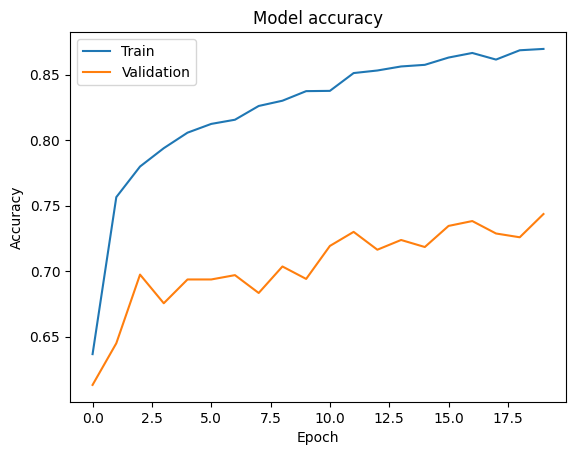

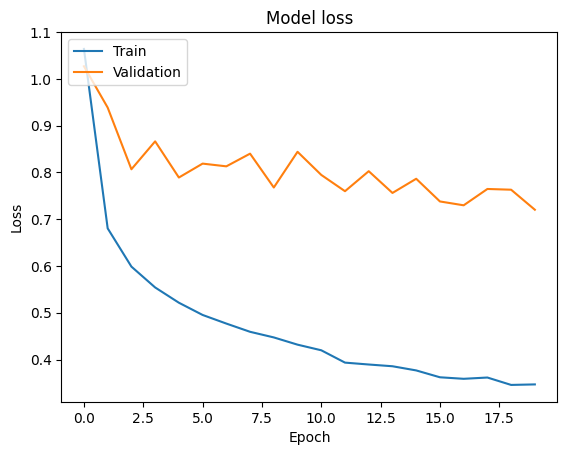

In [64]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
